In [27]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [23]:
tf.__version__

'2.1.0'

In [24]:
df = pd.read_csv('../Data_Preprocessing/Clean/US.csv')

In [30]:
df['Date']= pd.to_datetime(df['Date'])

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 9 columns):
Country/Region       81 non-null object
Date                 81 non-null datetime64[ns]
Confirmed_Cases      81 non-null int64
Recoveries           81 non-null int64
Deaths               81 non-null int64
Online_School        81 non-null int64
Social_Distancing    81 non-null int64
Travel_Ban           81 non-null int64
Army_Deployed        81 non-null int64
dtypes: datetime64[ns](1), int64(7), object(1)
memory usage: 5.8+ KB


In [32]:
df.head()

,Country/Region,Date,Confirmed_Cases,Recoveries,Deaths,Online_School,Social_Distancing,Travel_Ban,Army_Deployed
0,US,2020-01-22,1,0,0,0,0,1,0
1,US,2020-01-23,0,0,0,0,0,1,0
2,US,2020-01-24,1,0,0,0,0,1,0
3,US,2020-01-25,0,0,0,0,0,1,0
4,US,2020-01-26,3,0,0,0,0,1,0


/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


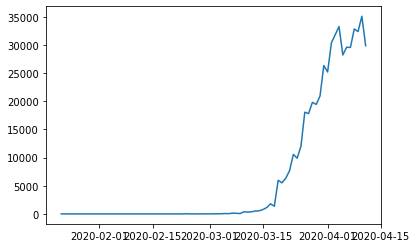

In [34]:
plt.plot(df['Date'], df['Confirmed_Cases'])

In [101]:
train_size = int(len(df) * 0.9)
test_size = len(df) - train_size
train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)]

In [102]:
X_train = train.iloc[:,[2]]
y_train = train.iloc[:,[2]]
X_test = test.iloc[:,[2]]
y_test = test.iloc[:,[2]]

In [103]:
X_train

,Confirmed_Cases
0,1
1,0
2,1
3,0
4,3
5,0
6,0
7,0
8,0
9,2


In [115]:
def create_dataset(X, y, time_steps=3):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [116]:
X_train_ts, y_train_ts = create_dataset(X_train, y_train)
X_test_ts, y_test_ts = create_dataset(X_train, y_train)

print(X_train_ts.shape, y_train_ts.shape)

(69, 3, 1) (69, 1)


In [117]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(
  units=600, return_sequences=True,
  input_shape=(X_train_ts.shape[1], X_train_ts.shape[2])
))
model.add(tf.keras.layers.LSTM(
  units=600, return_sequences=True))
model.add(tf.keras.layers.LSTM(
  units=600))
model.add(tf.keras.layers.Dense(units=1))
model.compile(
  loss='mean_squared_error',
  optimizer=tf.keras.optimizers.Adam(0.001)
)

In [118]:
history = model.fit(
    X_train_ts, y_train_ts,
    epochs=100,
    batch_size=16,
    validation_split=0.1,
    verbose=1,
    shuffle=False
)

Train on 62 samples, validate on 7 samples
Epoch 1/100
62/62 [==============================] - 7s 119ms/sample - loss: 13753707.5668 - val_loss: 539294528.0000
Epoch 2/100
62/62 [==============================] - 0s 4ms/sample - loss: 13707614.6650 - val_loss: 538524544.0000
Epoch 3/100
62/62 [==============================] - 0s 5ms/sample - loss: 13683867.0068 - val_loss: 538275328.0000
Epoch 4/100
62/62 [==============================] - 0s 5ms/sample - loss: 13678215.5313 - val_loss: 538193536.0000
Epoch 5/100
62/62 [==============================] - 0s 5ms/sample - loss: 13674296.1063 - val_loss: 538128256.0000
Epoch 6/100
62/62 [==============================] - 0s 4ms/sample - loss: 13670638.0418 - val_loss: 538066176.0000
Epoch 7/100
62/62 [==============================] - 0s 5ms/sample - loss: 13667024.6610 - val_loss: 538004608.0000
Epoch 8/100
62/62 [==============================] - 0s 4ms/sample - loss: 13663424.0793 - val_loss: 537943424.0000
Epoch 9/100
62/62 [========

Epoch 71/100
62/62 [==============================] - 0s 5ms/sample - loss: 13456696.9831 - val_loss: 534387904.0000
Epoch 72/100
62/62 [==============================] - 0s 4ms/sample - loss: 13453531.7553 - val_loss: 534333024.0000
Epoch 73/100
62/62 [==============================] - 0s 4ms/sample - loss: 13450361.7232 - val_loss: 534278144.0000
Epoch 74/100
62/62 [==============================] - 0s 5ms/sample - loss: 13447194.7106 - val_loss: 534223296.0000
Epoch 75/100
62/62 [==============================] - 0s 5ms/sample - loss: 13444034.8679 - val_loss: 534168480.0000
Epoch 76/100
62/62 [==============================] - 0s 5ms/sample - loss: 13440873.6096 - val_loss: 534113568.0000
Epoch 77/100
62/62 [==============================] - 0s 5ms/sample - loss: 13437719.1811 - val_loss: 534058784.0000
Epoch 78/100
62/62 [==============================] - 0s 4ms/sample - loss: 13434566.7204 - val_loss: 534004064.0000
Epoch 79/100
62/62 [==============================] - 0s 5ms/sam

In [119]:
y_pred = model.predict(X_test_ts)

In [120]:
y_pred

array([[  4.169564  ],
       [  0.34161007],
       [  4.4248385 ],
       [  1.3480328 ],
       [  9.208558  ],
       [ -0.6420001 ],
       [ -0.6420001 ],
       [ -0.17526303],
       [  1.3946652 ],
       [  9.973352  ],
       [  4.4248385 ],
       [  1.3480328 ],
       [  9.208558  ],
       [ -0.6420001 ],
       [ -0.6420001 ],
       [ -0.6420001 ],
       [ -0.6420001 ],
       [ -0.6420001 ],
       [ -0.3868239 ],
       [  0.34161007],
       [  4.169564  ],
       [  0.34161007],
       [  3.9729695 ],
       [ -0.6420001 ],
       [ -0.6420001 ],
       [ -0.6420001 ],
       [ -0.6420001 ],
       [ -0.6420001 ],
       [ -0.17526303],
       [  1.0050052 ],
       [  7.46347   ],
       [  5.894871  ],
       [  6.2399116 ],
       [  0.8121581 ],
       [  1.482644  ],
       [  9.27508   ],
       [  8.072545  ],
       [ 16.668928  ],
       [ 20.48852   ],
       [ 32.931107  ],
       [ 66.29182   ],
       [ 43.686913  ],
       [142.3148    ],
       [151

In [121]:
temp = df['Confirmed_Cases'].to_list()

In [125]:
temp[60:68]

[7676, 10571, 9893, 12038, 18058, 17821, 19808, 19444]